In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/Colab Notebooks/BJPCONGRESS/"


In [0]:
import pandas as pd

import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
df_bjp = pd.read_csv(path+"BJP.csv", encoding="ISO-8859-1")


def returneditedBJP (x): 
  comment = x.lower()
  if( (' rahul ' not in comment and 'rahul ' not in comment) and ' congress ' not in comment and ' cong ' not in comment):
    comment = ' BJP ' + comment
  elif ('rahul' in comment or ' rahul' in comment or 'rahul ' in comment):
    comment = comment.replace('rahul', ' CONGRESS RAHUL ' )

  return comment

  


df_bjp['commentText'] =  df_bjp['commentText'].apply(lambda x : returneditedBJP(x)) 

    
#df_bjp['commentText'] =  df_bjp['commentText'].apply(lambda x : ' BJP ' + x if 'Rahul'  not in x.split()) 


def returnedited (x):
  comment = x.lower()
  if( (' modi ' not in comment or 'modi ' not in comment) and ' bjp ' not in comment):
    comment = ' CONGRESS ' + comment
    
  elif ( 'modi '  in comment or  ' modi' in comment) :
    comment = comment.replace('modi ', ' BJP MODI ' )
    
  return comment

df_congress = pd.read_csv(path+"congress.csv", encoding="ISO-8859-1")
df_congress['commentText'] =  df_congress['commentText'].apply(lambda x : returnedited(x)) 

    
    
  
    
df_congress["newLabel"] = 0

df_congress.columns
df_bjp.head()  
#df_bjp= df_congress
#df_bjp.head()

,commentText,Label
0,BJP banda apna 100 % best he,1
1,BJP we need the king maker ---- narendra modi,1
2,BJP awesome... banda apna best hai,1
3,BJP best pm ever,1
4,CONGRESS RAHUL gandhi left the chat,1


In [0]:
df_congress.newLabel[df_congress.Label == 0] =1
df_congress.newLabel[df_congress.Label == 1] =0
df_congress.drop(columns="Label", inplace= True)
df_congress.rename(columns={"newLabel":"Label"} , inplace= True)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
print(df_bjp.shape)
print(df_congress.shape)
df_bjp = pd.concat([df_bjp, df_congress])

print(df_bjp.shape)
df_bjp.columns
df_bjp.reset_index(inplace= True)

(1952, 2)
(1998, 2)
(3950, 2)


In [0]:
import nltk
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

punc = ['.', ',', '"', "'", '?','??', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'???']
hingstops= ['kaun', 'kyun', 'im', 'm', 'i', 'se', 'u', 'esi', 'ho', 'is', 'aap', 'ab', 'actually', 'alreadi', 'always', 'amaz', 'ap', 'apna', 'apne', 'apni', 'aur', 'b', 'j', 'b', 'j', 'p', 
            'banda', 'aa', 'aab', 'aadmi', 'aam', 'ad' ,'agar' ,'aisa', 'aise', 'aisi', 'ak', 'bar', 'aur', 'away', 'b', 'baad', 'd', 'abhi', 'baat', 'hai'
            'h', 'ko', 'ku', 'vs', 'boy', 'bro', 'brothers', 'sisters' ,'sister', 'brother', 'bt', 'c', 'chal', 'chale', 'cm', 'com', 'yaar',
            'bhar', 'bhi', 'itni', 'bhot', 'bhut', 'bilkul', 'till', 'tha' ,'h', 'ye' ,'y', 'yuhi', 'yun', 'to', 'e', 'ki', 'ad', 'd', 'g', 'tha', 'modi','rahul','2019']
# stop =stopwords.words('english')#
# stop.extend(hingstops)
#stop.extend(punc)
#stop.extend(text.ENGLISH_STOP_WORDS)
stop_words= punc


# stop.extend(punc)
# l1= df_hing.STOPWORDS.tolist()
# stop.extend(l1)
#stop_words = text.ENGLISH_STOP_WORDS.union(punc)
#stopwords.union(hingstops)
# stop.extend(stop_words)
# stop_words= stop
#stop_words= punc
# stop_words = text.ENGLISH_STOP_WORDS.union(punc)
# stop_words = stop_words.union(np.array(df_hing.STOPWORDS))

len(stop_words)
#stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


17

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

stemmer = SnowballStemmer('english')

wordnet_lemmatizer = WordNetLemmatizer()
    
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

   
  
def tokenize(text):
  wordlist= []
  for word in tokenizer.tokenize(text.lower()):
   
    #word = stemmer.stem(word)
    #nltk.pos_tag(word) wordnet_lemmatizer.lemmatize(word)
    wordlist.append(word)
  return wordlist



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#  CNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics
from sklearn.model_selection import train_test_split

max_fatures = 1000 #or vocab size
tokenizer = Tokenizer(nb_words=max_fatures, split=' ', )
tokenizer.fit_on_texts(df_bjp.commentText.values)
X1 = tokenizer.texts_to_sequences(df_bjp.commentText.values)
X1 = sequence.pad_sequences(X1, maxlen= max_fatures)
#X1_texts_mat = sequence.pad_sequences(X1, maxlen=max_fatures)

Y1 = (df_bjp.Label).values #pd.get_dummies
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


(2962, 1000) (2962,)
(988, 1000) (988,)
Found 5824 unique tokens.


In [0]:
# from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation ##80 acc batch 100 , epoch 50
# embed_dim = 150
# lstm_out = 500
# model = Sequential()
# model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.2))
# model.add(Conv1D(150, 5, activation='relu')) # 128 * 128 5 FILTERS i/p - 10 filters +1 = 491
# model.add(MaxPooling1D(pool_size=3)) # 4 LAYERS OF POOLING
# model.add(LSTM(64, dropout_U=0.2,dropout_W=0.2, return_sequences = False))
# #model.add(LSTM(50, dropout_U=0.2,dropout_W=0.2, return_sequences = False))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
# print(model.summary())

# from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation 80.76 2249 sec,  1.13  acctrain -98.73
# embed_dim = 150
# lstm_out = 500
# model = Sequential()
# model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.1))
# model.add(Conv1D(64, 5, activation='relu')) # 128 * 128 5 FILTERS i/p - 10 filters +1 = 491
# model.add(MaxPooling1D(pool_size=3)) # 4 LAYERS OF POOLING
# model.add(LSTM(64, dropout_U=0.1,dropout_W=0.1, return_sequences = False))
# #model.add(LSTM(50, dropout_U=0.2,dropout_W=0.2, return_sequences = False))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
# print(model.summary())

# from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
# embed_dim = 150
# lstm_out = 500
# model = Sequential()
# model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.1))
# model.add(Conv1D(64, 5, activation='relu')) # 128 * 128 5 FILTERS i/p - 10 filters +1 = 491
# model.add(MaxPooling1D(pool_size=4)) # 4 LAYERS OF POOLING
# model.add(Conv1D(64, 2, activation='relu'))
# model.add(MaxPooling1D(pool_size=4))
# model.add(LSTM(64, dropout_U=0.1,dropout_W=0.1, return_sequences = False))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
# print(model.summary()) best 95.58

from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
embed_dim = 150
lstm_out = 500
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.1))
model.add(Conv1D(64, 5, activation='relu')) # 128 * 128 5 FILTERS i/p - 10 filters +1 = 491
model.add(MaxPooling1D(pool_size=4)) # 4 LAYERS OF POOLING
model.add(Conv1D(64, 2, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(64,  return_sequences = False))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary()) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 1000, 150)         150000    
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 996, 64)           48064     
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 249, 64)           0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 248, 64)           8256      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 62, 64)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total para

In [0]:
import time

start_time = time.clock()

model.fit(X1_train,Y1_train,batch_size=35,epochs=15,verbose=1)
print (time.clock() - start_time, "seconds")


Epoch 1/15
2962/2962 [==============================] - 36s 12ms/step - loss: 0.6484 - acc: 0.6050
Epoch 2/15
2962/2962 [==============================] - 31s 10ms/step - loss: 0.4631 - acc: 0.7883
Epoch 3/15
2962/2962 [==============================] - 31s 10ms/step - loss: 0.3097 - acc: 0.8744
Epoch 4/15
2962/2962 [==============================] - 31s 10ms/step - loss: 0.2179 - acc: 0.9190
Epoch 5/15
2962/2962 [==============================] - 31s 10ms/step - loss: 0.1545 - acc: 0.9463
Epoch 6/15
2962/2962 [==============================] - 31s 10ms/step - loss: 0.1036 - acc: 0.9659
Epoch 7/15
2962/2962 [==============================] - 30s 10ms/step - loss: 0.0923 - acc: 0.9733
Epoch 8/15
2962/2962 [==============================] - 30s 10ms/step - loss: 0.0720 - acc: 0.9733
Epoch 9/15
2962/2962 [==============================] - 30s 10ms/step - loss: 0.0696 - acc: 0.9757
Epoch 10/15
2962/2962 [==============================] - 31s 10ms/step - loss: 0.0674 - acc: 0.9787
Epoch 11/

In [0]:
model.evaluate(X1_test, Y1_test)

988/988 [==============================] - 5s 5ms/step


[0.933925789860096, 0.8178137654235006]

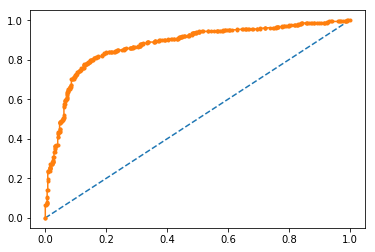

In [0]:
# from sklearn.metrics import precision_recall_curve
# precision, recall, thresholds = precision_recall_curve(Y1_test, model.predict(X1_test))
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X1_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y1_test, model.predict(X1_test))

from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_keras, tpr_keras, marker='.')
# show the plot
pyplot.show()

# RNN

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
import re


In [0]:
embed_dim = 150
lstm_out = 500
rnn = Sequential()
rnn.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.1))
rnn.add(LSTM(64,  return_sequences = True))
rnn.add(LSTM(64,  return_sequences = False))

#model.add(LSTM(50, dropout_U=0.2,dropout_W=0.2, return_sequences = False))
rnn.add(Dense(1,activation='sigmoid'))
rnn.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(rnn.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 1000, 150)         150000    
_________________________________________________________________
lstm_22 (LSTM)               (None, 1000, 64)          55040     
_________________________________________________________________
lstm_23 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 238,129
Trainable params: 238,129
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
import time

start_time = time.clock()

rnn.fit(X1_train,Y1_train,batch_size=35,epochs=15,verbose=1)
print (time.clock() - start_time, "seconds")


Epoch 1/15
2962/2962 [==============================] - 153s 52ms/step - loss: 0.6275 - acc: 0.6246
Epoch 2/15
2962/2962 [==============================] - 147s 50ms/step - loss: 0.4920 - acc: 0.7698
Epoch 3/15
2962/2962 [==============================] - 148s 50ms/step - loss: 0.4165 - acc: 0.8120
Epoch 4/15
2962/2962 [==============================] - 148s 50ms/step - loss: 0.3642 - acc: 0.8494
Epoch 5/15
2962/2962 [==============================] - 148s 50ms/step - loss: 0.3144 - acc: 0.8697
Epoch 6/15
2962/2962 [==============================] - 148s 50ms/step - loss: 0.2770 - acc: 0.8883
Epoch 7/15
2962/2962 [==============================] - 148s 50ms/step - loss: 0.2468 - acc: 0.8984
Epoch 8/15
2962/2962 [==============================] - 148s 50ms/step - loss: 0.2191 - acc: 0.9099
Epoch 9/15
2962/2962 [==============================] - 149s 50ms/step - loss: 0.1982 - acc: 0.9257
Epoch 10/15
2962/2962 [==============================] - 149s 50ms/step - loss: 0.1709 - acc: 0.9355

In [0]:
rnn.evaluate(X1_test, Y1_test)

988/988 [==============================] - 12s 12ms/step


[0.9884313779321277, 0.8168016196745127]

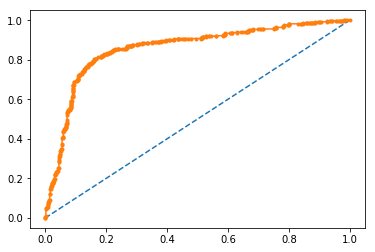

In [0]:
# from sklearn.metrics import precision_recall_curve
# precision, recall, thresholds = precision_recall_curve(Y1_test, model.predict(X1_test))
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X1_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y1_test, rnn.predict(X1_test))

from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_keras, tpr_keras, marker='.')
# show the plot
pyplot.show()

# MLP

In [0]:
vectorizer = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 500, ngram_range=(1,3), lowercase= True)
tfdf = vectorizer.fit_transform(df_bjp.commentText)
words = vectorizer.get_feature_names()

# Method 2

In [0]:
from sklearn.model_selection import train_test_split
y= df_bjp.Label
X_train, X_test, y_train, y_test = train_test_split( tfdf, y, test_size=0.2, random_state=42)

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
mlp = Sequential()
mlp.add(Dense(500, input_dim=500, activation='relu'))
mlp.add(Dropout(0.1))
mlp.add(Dense(550, activation='relu'))
mlp.add(Dropout(0.1))

mlp.add(Dense(100, activation='relu'))
mlp.add(Dropout(0.1))

mlp.add(Dense(10, activation='relu'))
mlp.add(Dropout(0.1))


mlp.add(Dense(1, activation='sigmoid'))
#best2937 hiddden 200 1
# 82.10 500 550 500 5000 10
# Compile model
from keras import optimizers
opt =optimizers.adamax(lr=0.001)
mlp.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
import time

start_time = time.clock()


# Fit the model
mlp.fit(X_train, y_train, epochs=50, batch_size=150 )

print (time.clock() - start_time, "seconds")



Epoch 1/50
3160/3160 [==============================] - 1s 322us/step - loss: 0.6748 - acc: 0.5797
Epoch 2/50
3160/3160 [==============================] - 0s 142us/step - loss: 0.5989 - acc: 0.7294
Epoch 3/50
3160/3160 [==============================] - 0s 141us/step - loss: 0.5154 - acc: 0.7706
Epoch 4/50
3160/3160 [==============================] - 0s 152us/step - loss: 0.4445 - acc: 0.8063
Epoch 5/50
3160/3160 [==============================] - 0s 157us/step - loss: 0.3998 - acc: 0.8310
Epoch 6/50
3160/3160 [==============================] - 1s 160us/step - loss: 0.3595 - acc: 0.8544
Epoch 7/50
3160/3160 [==============================] - 0s 156us/step - loss: 0.3281 - acc: 0.8775
Epoch 8/50
3160/3160 [==============================] - 1s 159us/step - loss: 0.3064 - acc: 0.8848
Epoch 9/50
3160/3160 [==============================] - 1s 169us/step - loss: 0.2688 - acc: 0.9054
Epoch 10/50
3160/3160 [==============================] - 0s 157us/step - loss: 0.2516 - acc: 0.9165
Epoch 11/

790/790 [==============================] - 0s 119us/step
[0.697358520121514, 0.8113924053650868]
AUC: 0.8872529193870411


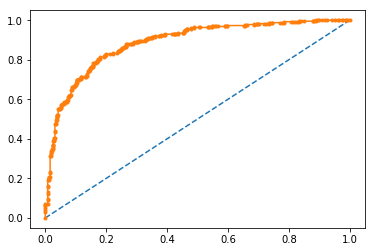

In [0]:
print(mlp.evaluate(X_test, y_test))
# from sklearn.metrics import precision_recall_curve
# precision, recall, thresholds = precision_recall_curve(Y1_test, model.predict(X1_test))
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, mlp.predict(X_test))

from sklearn.metrics import roc_auc_score, auc
from matplotlib import pyplot

print("AUC: "+ str(auc(fpr_keras, tpr_keras)))

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_keras, tpr_keras, marker='.')
# show the plot
pyplot.show()

# MLP EMBEDED

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
max_fatures = 128 #or vocab size
tokenizer = Tokenizer(nb_words=max_fatures, split=' ', )
tokenizer.fit_on_texts(df_bjp.commentText.values)
X1 = tokenizer.texts_to_sequences(df_bjp.commentText.values)
X1 = pad_sequences(X1, maxlen= max_fatures)
#X1_texts_mat = sequence.pad_sequences(X1, maxlen=max_fatures)

Y1 = (df_bjp.Label).values #pd.get_dummies
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


(2962, 128) (2962,)
(988, 128) (988,)


In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Flatten


embed_dim = 128
lstm_out = 500
mlp_embd = Sequential()
mlp_embd.add(Embedding(max_fatures, embed_dim,input_length = X1_train.shape[1] ))
# embed_dim = 150
mlp_embd.add(Flatten())

mlp_embd.add(Dense(1000, activation='relu'))
mlp_embd.add(Dropout(0.1))
mlp_embd.add(Dense(550, activation='relu'))
mlp_embd.add(Dropout(0.1))

mlp_embd.add(Dense(10, activation='relu'))
mlp_embd.add(Dropout(0.1))


mlp_embd.add(Dense(1, activation='sigmoid'))
#best2937 hiddden 200 1
# 82.10 500 550 500 5000 10
# Compile model


In [0]:
from keras import optimizers
opt =optimizers.adamax(lr=0.001)
mlp_embd.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
import time

start_time = time.clock()


# Fit the model
mlp_embd.fit(X1_train, Y1_train, epochs=15, batch_size=150 )

print (time.clock() - start_time, "seconds")



Epoch 1/15
2962/2962 [==============================] - 13s 4ms/step - loss: 0.6980 - acc: 0.5017
Epoch 2/15
2962/2962 [==============================] - 12s 4ms/step - loss: 0.6936 - acc: 0.4922
Epoch 3/15
2962/2962 [==============================] - 12s 4ms/step - loss: 0.6929 - acc: 0.5017
Epoch 4/15
2962/2962 [==============================] - 12s 4ms/step - loss: 0.6929 - acc: 0.5017
Epoch 5/15
2962/2962 [==============================] - 12s 4ms/step - loss: 0.6927 - acc: 0.5017
Epoch 6/15
2962/2962 [==============================] - 12s 4ms/step - loss: 0.6926 - acc: 0.5020
Epoch 7/15
2962/2962 [==============================] - 12s 4ms/step - loss: 0.6925 - acc: 0.5020
Epoch 8/15
2962/2962 [==============================] - 12s 4ms/step - loss: 0.6924 - acc: 0.5020
Epoch 9/15
2962/2962 [==============================] - 12s 4ms/step - loss: 0.6923 - acc: 0.5020
Epoch 10/15
2962/2962 [==============================] - 12s 4ms/step - loss: 0.6924 - acc: 0.5017
Epoch 11/15
2962/29

In [0]:
print(mlp_embd.evaluate(X1_test, Y1_test))
# from sklearn.metrics import precision_recall_curve
# precision, recall, thresholds = precision_recall_curve(Y1_test, model.predict(X1_test))
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y1_test, mlp_embd.predict(X1_test))

from sklearn.metrics import roc_auc_score, auc
from matplotlib import pyplot

print("AUC: "+ str(auc(fpr_keras, tpr_keras)))

pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_keras, tpr_keras, marker='.')
# show the plot
pyplot.show()

pics


In [0]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Colab Notebooks/BJPCONGRESS/"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.utils import plot_model

mlp = Sequential()
mlp.add(Dense(500, input_dim=500, activation='relu'))
mlp.add(Dropout(0.1))
mlp.add(Dense(550, activation='relu'))
mlp.add(Dropout(0.1))

mlp.add(Dense(150, activation='relu'))
mlp.add(Dropout(0.1))

mlp.add(Dense(10, activation='relu'))
mlp.add(Dropout(0.1))


mlp.add(Dense(1, activation='sigmoid'))
#best2937 hiddden 200 1
# 82.10 500 550 500 5000 10
# Compile model
from keras import optimizers
opt =optimizers.adamax(lr=0.001)
mlp.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
import time
plot_model(mlp, to_file=path+'model.png' )



In [0]:
from keras.layers import Dense, Dropout, Embedding, LSTM
embed_dim = 150
lstm_out = 500
rnn = Sequential()
rnn.add(Embedding(1000, embed_dim,input_length = 1000, dropout=0.1))
rnn.add(LSTM(64,  return_sequences = True))
rnn.add(LSTM(64,  return_sequences = False))

#model.add(LSTM(50, dropout_U=0.2,dropout_W=0.2, return_sequences = False))
rnn.add(Dense(1,activation='sigmoid'))
rnn.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
plot_model(rnn, to_file=path+'rnn.png' )


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  """


In [0]:

from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
embed_dim = 150
lstm_out = 500
model = Sequential()
model.add(Embedding(500, embed_dim,input_length = 500, dropout=0.1))
model.add(Conv1D(64, 5, activation='relu')) # 128 * 128 5 FILTERS i/p - 10 filters +1 = 491
model.add(MaxPooling1D(pool_size=4)) # 4 LAYERS OF POOLING
model.add(Conv1D(64, 2, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(64,  return_sequences = False))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
plot_model(model, to_file=path+'cnn.png' )


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
W0627 17:36:00.584810 140670752245632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

